In [1]:
import tensorflow

In [25]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
#importing the MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
#x consists of 3D arrays as numeric images whereas Y consists of label corresponding to the X image.
x_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

9


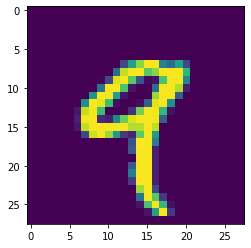

In [5]:
#viewing the imported MNIST data
plt.imshow(x_train[4])
print(y_train[4])

In [ ]:
x_train[2]

In [7]:
#the value of an image array ranges from 0 to 255. We have to convert the values to range from 0 to 1.
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[2]

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))                      #adding first layer by flattening the 28 by 28 pixel image
model.add(Dense(128, activation='relu'))                     #adding second layer i.e. hidden layer
model.add(Dense(10, activation='softmax'))                   #adding output layer

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
#defining a loss function and an optimizer for the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam')

In [27]:
mdl = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0134 - val_loss: 0.0942
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0120 - val_loss: 0.0921
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0083 - val_loss: 0.0988
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.1013
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0080 - val_loss: 0.1032
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0077 - val_loss: 0.1017
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0062 - val_loss: 0.1225
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0068 - val_loss: 0.1209
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0049 - val_loss: 0.1207
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.005

In [ ]:
y_prob = model.predict(x_test)

In [29]:
y_pred = y_prob.argmax(axis=1)   #gives the exact predicted labels

In [30]:
y_pred #predicted labels

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
y_test #actual labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
model.predict(x_test[5]).argmax(axis=1)          #testing the model

1/1 [==============================] - 0s 23ms/step


array([1])

In [33]:
y_test[5]

1

In [34]:
#checking models accuracy
accuracy_score(y_test, y_pred)

0.9778

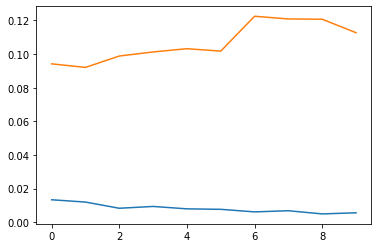

In [37]:
plt.plot(mdl.history['loss'])
plt.plot(mdl.history['val_loss'])

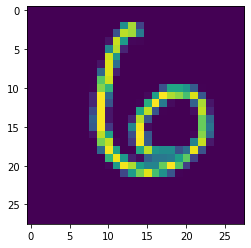

In [38]:
plt.imshow(x_test[100])

In [40]:
model.predict(x_test[100]).argmax(axis=1) #hence the model predicts the number correctly

1/1 [==============================] - 0s 21ms/step


array([6])